## Task 1: TF-IDF [60 marks]

Implement the TF-IDF algorithm. You need to write your own compute_tf, and compute_idf functions.

In [40]:
import numpy as np
import re
# OPTIONALLY USING 'prettytable' module
# I USED 'pip install prettytable' in terminal to install
from prettytable import PrettyTable
 
tf_list = []
idf = {}
tfidf_list = []
filename_list = []
tfidf = {}

def punct_cleaner(word):
    comp = re.compile("[^A-Z^a-z^0-9^']")       #Use RegEx to clean the word of punctuations, for example: "[Throwin' " ——> "Throwin' "
    cleaned_word = comp.sub('', word)           #The ' sign and blankspace are not cleared! (We don't want 'don't' to be turned into 'dont')
    return cleaned_word

def compute_TF(file, ):
    tf = {}
    comp = re.compile("\.txt")
    tf_name = comp.sub('', file)                #Use RegEx to extract file name
    lyrics = open(file,'r')
    for lines in lyrics:
        line_length = len(lines.split())
        for i in range(line_length):
            word = lines.split()[i]
            word = punct_cleaner(word)
            if word in tf:
                tf[word] += 1
            else:
                tf[word] = 1
    del tf["SONGBOUNDARY"]                          #Delete the song seperator <SONG_BOUNDARY>
    print('TF of {} computed!'.format(tf_name))
    tf_list.append(tf)
    filename_list.append(tf_name)

def compute_IDF():
    df = {}
    N = 4
    for tf in tf_list:
        for word in tf:
            if word in df:
                df[word] += 1
            else:
                df[word] = 1
    for word in df:
        idf[word] = np.log10(N/df[word])

def compute_TFIDF():
    tf_counter = 0
    for tf in tf_list:
        for word in tf:
            tfidf_value = tf[word]*idf[word]                #Using only RAW COUNTS for TF value
            # tfidf_value = np.log10(tf[word]+1)*idf[word]    #SQUASHING raw counts (as in PPT slides) for TF value
            tfidf_value_list = [0,0,0,0]
            tfidf_value_list[tf_counter] = tfidf_value
            if word in tfidf:
                tfidf_value_list = np.array(tfidf_value_list)+np.array(tfidf[word])             #This variable type is np.array
                tfidf[word] = tfidf_value_list
            else:
                tfidf[word] = tfidf_value_list
        tfidf_list.append(tfidf)
        tf_counter += 1

#Compute TFs
print('———— STEP ONE ————')
compute_TF('country.txt')
compute_TF('pop.txt')
compute_TF('rap.txt')
compute_TF('rock.txt')
print('TFs is computed as :\n{}'.format(tf_list))

#Compute IDF
print('\n———— STEP TWO ————')
compute_IDF()
print('IDF computated as :\n{}'.format(idf))

#Compute TF-IDFs
print('\n———— STEP THREE ————')
compute_TFIDF()
print('TF-IDFs computated! Length of IDFs :\n{}'.format(len(tfidf_list[3]))) ###

#Execute the TF-IDF results
print('\n———— FINAL RESULTS ————')
for i in range(4):
    print('TF-IDF results of {}:'.format(filename_list[i]))
    for word in tfidf:
        print("\t%s\t|\t%f" % (word, tfidf[word][i]))

### ———————————————————————————— CODES BLEOW ARE DEPENDANT ON PRETTYTABLE ———————————————————————————— ###

# Use PRETTYTABLE module to show the results in an integrated table

pt = PrettyTable(field_names=["Term/Filename",
                              '{}'.format(filename_list[0]),
                              '{}'.format(filename_list[1]),
                              '{}'.format(filename_list[2]),
                              '{}'.format(filename_list[3])])
for word in tfidf:
    pt.add_row([word,
                "%f"%(tfidf[word][0]),
                "%f"%(tfidf[word][1]),
                "%f"%(tfidf[word][2]),
                "%f"%(tfidf[word][3])])
print(pt)

# Save results into the file: TFIDF_(type).txt

TFIDF_saver = open('TF-IDF RESULTS.txt','w')
TFIDF_saver.write('Term | TF-IDF country | TF-IDF pop | TF-IDF rap | TF-IDFrock\n')
for word in tfidf:
    TFIDF_saver.write(word)
    TFIDF_saver.write('\t|\t')
    values = ''
    for j in range(4):
        values += "%f\t|\t"%(tfidf[word][j])
    TFIDF_saver.write(values)
    TFIDF_saver.write('\n')
TFIDF_saver.close()
print('———— Output Results Saved! Filename: TFIDF_country.txt ————')

———— STEP ONE ————
TF of country computed!
TF of pop computed!
TF of rap computed!
TF of rock computed!
TFs is computed as :
[{'I': 2486, "couldn't": 28, 'help': 28, 'but': 174, 'overhear': 1, 'you': 1806, 'talking': 16, 'to': 1345, 'yourself': 12, 'How': 29, 'she': 234, 'slipped': 3, 'right': 178, 'through': 71, 'your': 642, 'hands': 48, 'And': 636, 'in': 1003, 'between': 20, 'all': 402, 'of': 722, 'the': 2364, 'four': 16, 'letter': 2, 'words': 23, 'You': 348, 'said': 112, 'never': 226, 'gonna': 190, 'understand': 20, 'gave': 22, 'her': 318, 'everything': 58, 'thought': 72, 'ever': 93, 'wanted': 27, 'Now': 47, 'want': 151, 'is': 281, 'gone': 60, 'Your': 29, 'Just': 86, 'One': 12, 'Many': 1, 'Broken': 8, 'Hearted': 2, 'Wondering': 5, 'what': 289, 'went': 19, 'wrong': 47, 'Welcome': 10, 'club': 4, "Don't": 77, 'be': 508, 'thinking': 15, "you're": 215, 'only': 75, 'one': 234, "Who's": 10, 'heart': 185, 'was': 254, 'a': 1818, 'hit': 22, 'and': 1087, 'run': 52, 'While': 11, 'looked': 8, 'o

## Task 2: Kmeans clustering [40 marks]

Perform kmeans clustering with the TF-IDF weights. You need to initialize the kmeans centroid in two different ways: random initialization, and smart initialization where you initialize the centroid with a vector from each category.

Here are your tasks

*   Visualize the clustering results from random initialization. each cluster need to have its own color, and highlight the centroid
*   Visualize the clustering results from smart initialization. each cluster need to have its own color, and highlight the centroid
*   Calculate the cosine similarity of the kmeans centroid from smart initialization. Present your result in a table
*   Discuss the difference and your observation

You may use scikit-learn for kmeans clustering and t-SNE visualization



d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


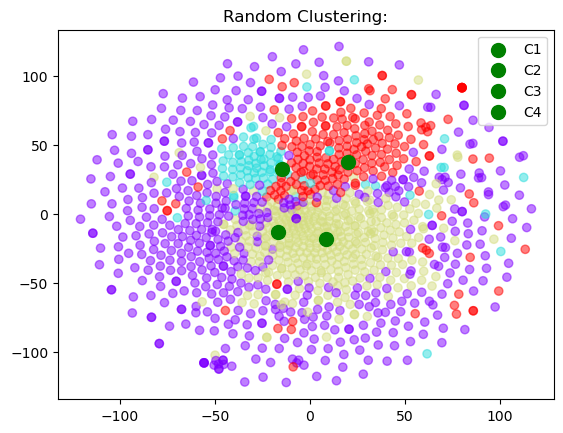

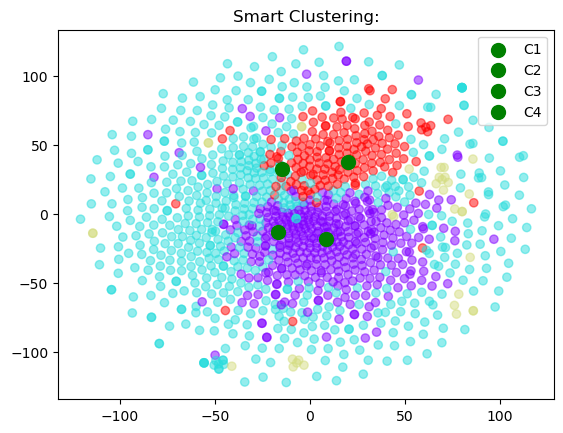

In [256]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import requests
from sklearn.cluster import KMeans

def inter_cluster(cluster_indices):   #function for iterating cluster points
    for label in np.unique(RANDOM_C):
        cluster_indices = np.where(RANDOM_C == label)[0]
        centroid = np.mean(T_V[cluster_indices], axis=0)
        plt.scatter(centroid[0], centroid[1], c='green', marker='o', s=100, label=f'C{label+1}')
# Load data
CAT = ['country', 'pop', 'rap', 'rock']
lyrics_text = {}
for category in CAT:
    lyrics_url = f"https://slpcourse.github.io/materials/lyrics/{category}.txt"
    lyrics_text[category] = requests.get(lyrics_url).text.split("<SONG_BOUNDARY>")
#Create vectors for all CAT
vectorizer = TfidfVectorizer()
all_lyrics = []
for category, songs in lyrics_text.items():
    all_lyrics.extend(songs)
all_tfidf_vectors = vectorizer.fit_transform(all_lyrics)
#Group data & Stacking
lyrics_data = {}
current_index = 0
for category, songs in lyrics_text.items():
    num_songs = len(songs)
    lyrics_data[category] = all_tfidf_vectors[current_index:current_index+num_songs]
    current_index += num_songs
all_vectors = np.vstack([lyrics_data[category].toarray() for category in CAT])
#Cluster via random & smart methods
RANDOM = KMeans(n_clusters=4, init='random', random_state=42)
RANDOM_C = RANDOM.fit_predict(all_vectors)
CENTERS = np.vstack([lyrics_data[category][0].toarray() for category in CAT])  # Use first vector from each category as centroids
SMART = KMeans(n_clusters=4, init=CENTERS, n_init=1, random_state=42)
SMART_C = SMART.fit_predict(all_vectors)
# Reduce the dimensionality of the data for visualization
T = TSNE(n_components=2, random_state=42)
T_V = T.fit_transform(all_vectors)
# Plot the clustering results
plt.scatter(T_V[:, 0], T_V[:, 1], c=RANDOM_C, cmap='rainbow', alpha=0.5)
inter_cluster(cluster_indices)
plt.title('Random Clustering:')
plt.legend()
plt.show()

#Smart :
plt.scatter(T_V[:, 0], T_V[:, 1], c=SMART_C, cmap='rainbow', alpha=0.5)
inter_cluster(cluster_indices)
plt.title('Smart Clustering:')
plt.legend()
plt.show()

In [257]:
### RANDOM:
# Calculate cosine similarity & Create a table from the cosine similarity matrix
SIMIL_COS = cosine_similarity(RANDOM.cluster_centers_)
Table_random = pd.DataFrame(SIMIL_COS, columns=CAT, index=CAT)
print(Table_random)
### SMART:
# Calculate cosine similarity & Create a table from the cosine similarity matrix
SIMIL_COS = cosine_similarity(SMART.cluster_centers_)
Table_smart = pd.DataFrame(SIMIL_COS, columns=CAT, index=CAT)
print(Table_smart)

          country       pop       rap      rock
country  1.000000  0.633132  0.842584  0.787820
pop      0.633132  1.000000  0.551227  0.586385
rap      0.842584  0.551227  1.000000  0.697864
rock     0.787820  0.586385  0.697864  1.000000
          country       pop       rap      rock
country  1.000000  0.826707  0.510841  0.697071
pop      0.826707  1.000000  0.537595  0.799569
rap      0.510841  0.537595  1.000000  0.536381
rock     0.697071  0.799569  0.536381  1.000000


In [ ]:
### SCRATCH ...

# # impement your TF-IDF algorithms here
# import numpy as np
# import re

# # OPTIONALLY USING 'prettytable' module
# # I USED 'pip install prettytable' in terminal to install
# from prettytable import PrettyTable

# tf_list = []
# idf = {}
# tfidf_list = []
# filename_list = []

# def punct_cleaner(word):
#     comp = re.compile("[^A-Z^a-z^0-9^']")       #Use RegEx to clean the word of punctuations, for example: "[Throwin' " ——> "Throwin' "
#     cleaned_word = comp.sub('', word)           #The ' sign and blankspace are not cleared! (We don't want 'don't' to be turned into 'dont')
#     return cleaned_word

# def compute_TF(file, ):
#     tf = {}
#     comp = re.compile("\.txt")
#     tf_name = comp.sub('', file)                #Use RegEx to extract file name
#     lyrics = open(file,'r')
#     for lines in lyrics:
#         line_length = len(lines.split())
#         for i in range(line_length):
#             word = lines.split()[i]
#             word = punct_cleaner(word)
#             if word in tf:
#                 tf[word] += 1
#             else:
#                 tf[word] = 1
#     del tf["SONGBOUNDARY"]                          #Delete the song seperator <SONG_BOUNDARY>
#     print('TF of {} computed!'.format(tf_name))
#     tf_list.append(tf)
#     filename_list.append(tf_name)

# def compute_IDF():
#     df = {}
#     N = 4
#     for tf in tf_list:
#         for word in tf:
#             if word in df:
#                 df[word] += 1
#             else:
#                 df[word] = 1
#     for word in df:
#         idf[word] = np.log10(N/df[word])

# def compute_TFIDF():
#     for tf in tf_list:
#         tfidf = {}
#         for word in tf:
#             tfidf[word] = tf[word]*idf[word]                #Using only RAW COUNTS for TF value
#             # tfidf[word] = np.log10(tf[word]+1)*idf[word]    #SQUASHING raw counts (as in PPT slides) for TF value
#         tfidf_list.append(tfidf)

# #Compute TFs
# print('———— STEP ONE ————')
# compute_TF('country.txt')
# compute_TF('pop.txt')
# compute_TF('rap.txt')
# compute_TF('rock.txt')
# print('TFs is computed as :\n{}'.format(tf_list))

# #Compute IDF
# print('\n———— STEP TWO ————')
# compute_IDF()
# print('IDF computated as :\n{}'.format(idf))

# #Compute TF-IDFs
# print('\n———— STEP THREE ————')
# compute_TFIDF()
# print('TF-IDFs computated as :\n{}'.format(tfidf_list))

# #Execute the TF-IDF results
# print('\n———— FINAL RESULTS ————')
# for i in range(4):
#     print('TF-IDF results of {}:'.format(filename_list[i]))
#     for word in tfidf_list[i]:
#         print("\t%s\t|\t%f" % (word, tfidf_list[i][word]))

# ### ———————————————————————————————————— CODES BLEOW ARE OPTIONAL ——————————————————————————————————————————————— ###

# # Use PRETTYTABLE module to show the results

# for i in range(4):
#     pt = PrettyTable(field_names=['Terms in {}'.format(filename_list[i]), "TF_IDF Value"])
#     for word in tfidf_list[i]:
#         pt.add_row([word, "%f"%(tfidf_list[i][word])])
#     print(pt)

# # Save results into the file: TFIDF_(type).txt

# for i in range(4):
#     TFIDF_saver = open('TFIDF_{}.txt'.format(filename_list[i]),'w')
#     for word in tfidf_list[i]:
#         TFIDF_saver.write(word)
#         TFIDF_saver.write('\t|\t')
#         TFIDF_saver.write("%f"%(tfidf_list[i][word]))
#         TFIDF_saver.write('\n')
#     TFIDF_saver.close()
# print('———— Output Results Saved! Filename: TFIDF_country.txt ————')